In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Dataset Loading
st = pd.read_csv('/content/drive/My Drive/stress_dataset.csv')

Dataset Exploration and cleaning

In [71]:
#Load and view sample data
st.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
3,1,28,5,5.9,4,8,2,85,3000,140,90
4,1,28,5,5.9,4,8,2,85,3000,140,90
5,1,28,8,5.9,4,8,2,85,3000,140,90
6,1,29,9,6.3,6,7,2,82,3500,140,90
16,0,29,4,6.5,5,7,1,80,4000,132,87


In [6]:
# Dataset Information
st.info()

print("Shape of the Dataset",st.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
Shape of the Dataset (

In [7]:
# Statistical Summary
st.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
# Identifying Null Values
st.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [9]:
# Since a Major part of the data in the sleep Disorder Column is Null, we can drop the dataset
st.dropna(inplace=True)

In [10]:
st.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [11]:
# Checking the unique values for non-numerical features
occupation_unique_values = st['Occupation'].unique()
print("Unique values in 'Occupation' column:", occupation_unique_values)

bmi_unique_values = st['BMI Category'].unique()
print("Unique values in 'BMI' column:", bmi_unique_values)


Unique values in 'Occupation' column: ['Sales Representative' 'Software Engineer' 'Teacher' 'Nurse' 'Doctor'
 'Scientist' 'Lawyer' 'Accountant' 'Engineer' 'Salesperson']
Unique values in 'BMI' column: ['Obese' 'Normal Weight' 'Normal' 'Overweight']


In [12]:
# Since Normal weight and Normal are same, renaming the Normal weight to Normal for consistency
st['BMI Category'] = st['BMI Category'].replace('Normal weight', 'Normal')

In [13]:
# Since there are different categorical values, we can encode them into numerical data for Gender, Occupation, BMI Category, and Sleep Disorder Columns
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder=LabelEncoder()

categorical_cols=['Gender','Occupation','BMI Category','Sleep Disorder']
for col in categorical_cols:
    st[col] = label_encoder.fit_transform(st[col])

st.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,1,28,5,5.9,4,30,8,2,140/90,85,3000,1
4,5,1,28,5,5.9,4,30,8,2,140/90,85,3000,1
5,6,1,28,8,5.9,4,30,8,2,140/90,85,3000,0
6,7,1,29,9,6.3,6,40,7,2,140/90,82,3500,0
16,17,0,29,4,6.5,5,40,7,1,132/87,80,4000,1


In [14]:
#Here the blood pressure column is in string format and can be seperated into systolic and diastolic pressure and can be converted to numeric from string
st[['Systolic BP', 'Diastolic BP']] = st['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric type
st[['Systolic BP', 'Diastolic BP']] = st[['Systolic BP', 'Diastolic BP']].apply(pd.to_numeric)

# Drop the original 'Blood Pressure' column
st = st.drop('Blood Pressure', axis=1)

st.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
3,4,1,28,5,5.9,4,30,8,2,85,3000,1,140,90
4,5,1,28,5,5.9,4,30,8,2,85,3000,1,140,90
5,6,1,28,8,5.9,4,30,8,2,85,3000,0,140,90
6,7,1,29,9,6.3,6,40,7,2,82,3500,0,140,90
16,17,0,29,4,6.5,5,40,7,1,80,4000,1,132,87


In [15]:
# Since we don't have any usage of the Person id for our model training, we can drop it
st.drop('Person ID', axis=1, inplace=True)

In [16]:
# Here our Target feature is to find the stress level of a person based on the input data
#Checking the unique values for each stress level for the given dataset
st['Stress Level'].value_counts()

,count
Stress Level,
7,47
8,37
3,31
4,27
5,10
6,3


In [17]:
# checking the unique values for each feature
dict = {}
for i in list(st.columns):
    dict[i] = st[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Gender,2
Age,25
Occupation,10
Sleep Duration,22
Quality of Sleep,6
Physical Activity Level,10
Stress Level,6
BMI Category,4
Heart Rate,14
Daily Steps,13


Data Visualization

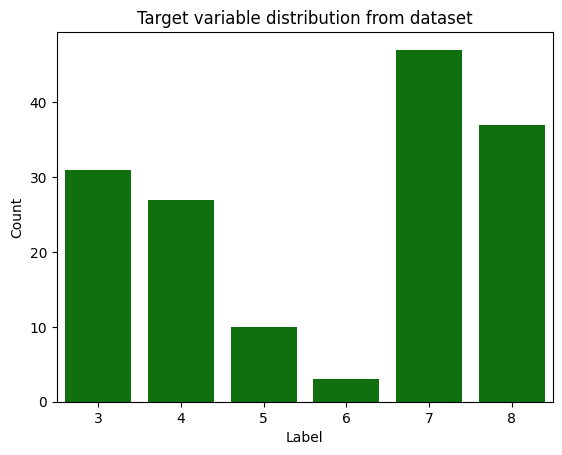

In [18]:
# Visualizing the stress levels of individuals
sns.countplot(x='Stress Level', data=st, color='green')

plt.xlabel('Label')

plt.ylabel('Count')

plt.title('Target variable distribution from dataset')

# Displaying the plot
plt.show()

In [19]:
#Occupation Distribution
occupation_counts = st['Occupation'].value_counts().reset_index()
occupation_counts.columns = ['Occupation', 'Count']

print(occupation_counts)

   Occupation  Count
0           4     64
1           9     31
2           6     30
3           1      7
4           0      7
5           2      6
6           3      5
7           5      2
8           7      2
9           8      1


In [20]:
fig = px.pie(
    occupation_counts,
    values='Count',
    names='Occupation',
    title='Distribution of Occupation',
    width=600,
    height=500
)

# Show the chart
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

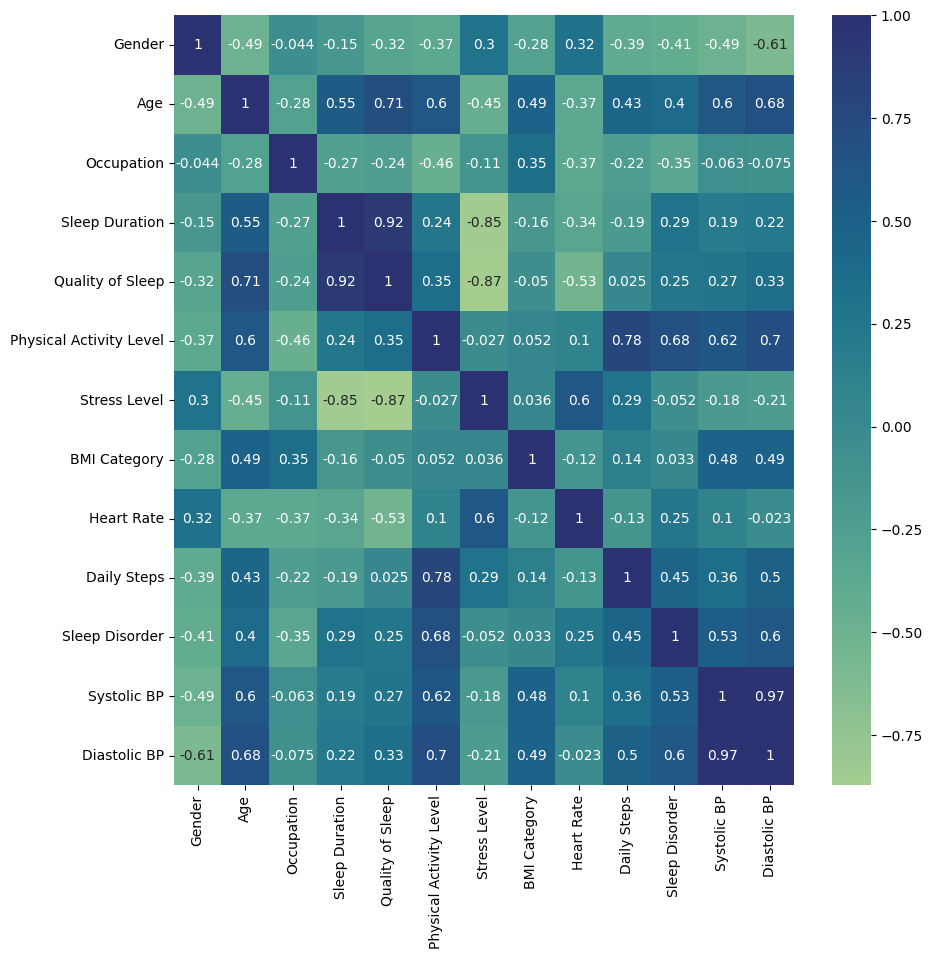

In [21]:
# Checking correaltions between the the features
plt.figure(figsize = (10, 10))
sns.heatmap(st.corr(), cmap = 'crest', annot = True)
plt.show

Based on the heat map
There is no correlation with the stress level and Sleep Disorder, Physical Activity Level. it's almost zero

So, we can drop Sleep Disorder and Physical Activity Level



In [22]:
st.drop('Sleep Disorder', axis=1, inplace=True)
st.drop('Physical Activity Level', axis=1, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

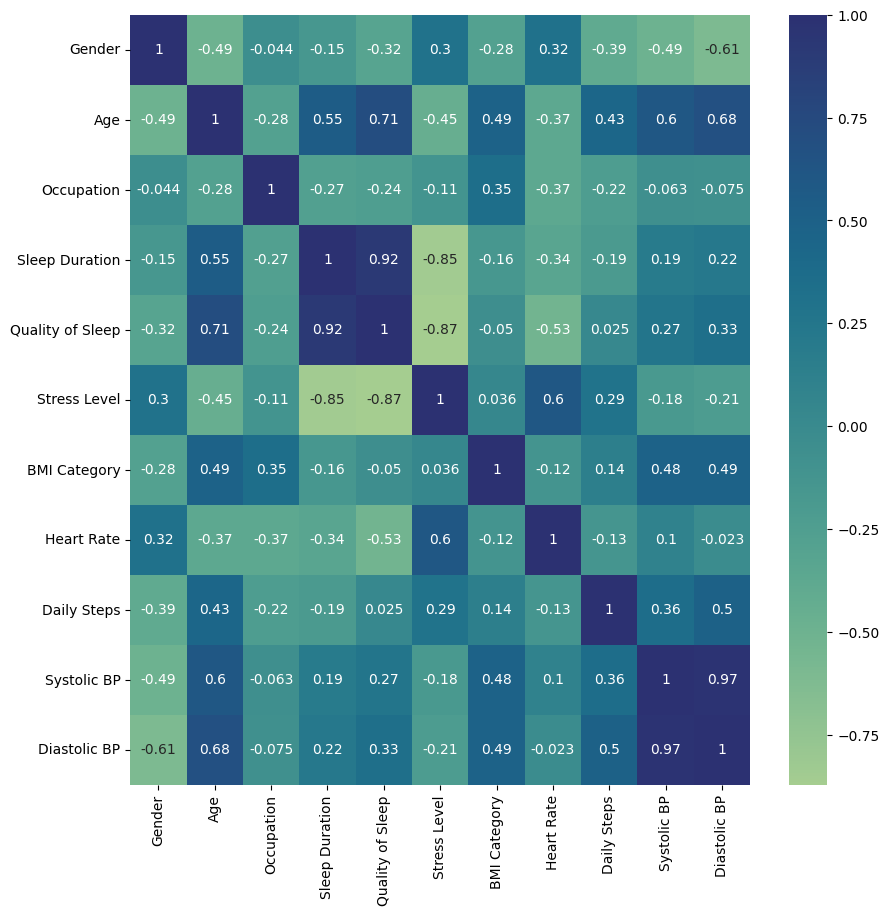

In [23]:
# Checking correaltions between the the features after dropping
plt.figure(figsize = (10, 10))
sns.heatmap(st.corr(), cmap = 'crest', annot = True)
plt.show

In [24]:
st.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
3,1,28,5,5.9,4,8,2,85,3000,140,90
4,1,28,5,5.9,4,8,2,85,3000,140,90
5,1,28,8,5.9,4,8,2,85,3000,140,90
6,1,29,9,6.3,6,7,2,82,3500,140,90
16,0,29,4,6.5,5,7,1,80,4000,132,87


In [25]:
# Importing required libraries for model training
from sklearn.model_selection import train_test_split    # For splitting data into training and testing sets
from sklearn.metrics import confusion_matrix            # Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import classification_report       # Import the classification_report function for detailed classification metrics
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [26]:
#Splitting into training and target features
X = st.drop(['Stress Level'], axis=1)
y = st['Stress Level']

In [27]:
# Split the data into training and testing sets (80% data for training, 20% data for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train shape: (124, 10)
y_train shape: (124,)
X_test shape: (31, 10)
y_test shape: (31,)


Training with Logistic Regression

In [42]:
# Model Fitting
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

predicted = model.predict(X_test)

# Confusion matrix
conf = confusion_matrix(y_test, predicted)
print("Confusion Matrix : \n", conf)

cr = classification_report(y_test, predicted, zero_division=0)
print("Classification Report:\n", cr)

# Printing the test accuracy
print("The test accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted) * 100, "%")


Confusion Matrix : 
 [[6 0 0 0 1 0]
 [1 0 0 6 0 0]
 [0 0 2 0 3 0]
 [0 0 1 0 0 0]
 [1 0 0 0 6 0]
 [0 0 1 0 0 3]]
Classification Report:
               precision    recall  f1-score   support

           3       0.75      0.86      0.80         7
           4       0.00      0.00      0.00         7
           5       0.50      0.40      0.44         5
           6       0.00      0.00      0.00         1
           7       0.60      0.86      0.71         7
           8       1.00      0.75      0.86         4

    accuracy                           0.55        31
   macro avg       0.48      0.48      0.47        31
weighted avg       0.51      0.55      0.52        31

The test accuracy of Logistic Regression is :  54.83870967741935 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Training with Random Forest

In [43]:
random_forest = RandomForestClassifier(n_estimators=13)
random_forest.fit(X_train,y_train)

random_forest.score(X_test,y_test)

y_predict = random_forest.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

report = classification_report(y_test, y_predict, zero_division=0)

# Print the classification report
print("Classification Report:")
print(report)

Confusion Matrix:
[[7 0 0 0 0 0]
 [0 7 0 0 0 0]
 [0 0 2 0 1 2]
 [0 0 1 0 0 0]
 [0 0 0 0 7 0]
 [0 0 0 0 0 4]]
Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       0.67      0.40      0.50         5
           6       0.00      0.00      0.00         1
           7       0.88      1.00      0.93         7
           8       0.67      1.00      0.80         4

    accuracy                           0.87        31
   macro avg       0.70      0.73      0.71        31
weighted avg       0.84      0.87      0.85        31



Decision Tree

In [44]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
decision_tree.score(X_test,y_test)

0.967741935483871

In [46]:
y_predict = decision_tree.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[7 0 0 0 0 0]
 [0 7 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 7 0]
 [0 0 0 0 0 4]]


In [47]:
report = classification_report(y_test, y_predict, zero_division=0)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       0.83      1.00      0.91         5
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         4

    accuracy                           0.97        31
   macro avg       0.81      0.83      0.82        31
weighted avg       0.94      0.97      0.95        31



The Logistic regression is giving an accuracy of only 54% as there is an undersampling in the dataset for certain features

The Random forest gives an accuracy of 87% and the Decision Tress gives an accuracy of 97%

Stress Level Prediction

In [55]:
import pandas as pd

def get_user_input():
    gender = int(input("Gender (Male: 1, Female: 0): "))
    age = int(input("Age: "))
    print("['Scientist =0','Doctor =1 ', 'Accountant =2', 'Teacher =3','Manager =4', 'Engineer = 5', 'Sales Representative =6', 'Lawyer =8','Salesperson =7','Software Engineer = 9', 'Nurse = 10']")
    occupation = int(input("Occupation (encoded): "))
    sleep_duration = float(input("Sleep Duration (hours): "))
    quality_of_sleep = int(input("Quality of Sleep (1-10): "))
    bmi_category = int(input("BMI Category (Underweight: 1, Normal: 2, Overweight: 3): "))
    heart_rate = int(input("Heart Rate (bpm): "))
    daily_steps = int(input("Daily Steps: "))
    systolic_bp = int(input("Systolic BP: "))  # Updated name
    diastolic_bp = int(input("Diastolic BP: "))  # Updated name

    # Create a dictionary with feature names matching those used during training
    input_data = {
        "Gender": [gender],
        "Age": [age],
        "Occupation": [occupation],
        "Sleep Duration": [sleep_duration],
        "Quality of Sleep": [quality_of_sleep],
        "BMI Category": [bmi_category],
        "Heart Rate": [heart_rate],
        "Daily Steps": [daily_steps],
        "Systolic BP": [systolic_bp],  # Updated name
        "Diastolic BP": [diastolic_bp],  # Updated name
    }

    # Convert to a DataFrame
    return pd.DataFrame(input_data)

Here, I am using decision tree for prediction of the stress level as it has more accuracy comparing other models

In [72]:
user_input = get_user_input()

predicted_stress_level = decision_tree.predict(user_input)

Gender (Male: 1, Female: 0): 1
Age: 39
['Scientist =0','Doctor =1 ', 'Accountant =2', 'Teacher =3','Manager =4', 'Engineer = 5', 'Sales Representative =6', 'Lawyer =8','Salesperson =7','Software Engineer = 9', 'Nurse = 10']
Occupation (encoded): 8
Sleep Duration (hours): 7.2
Quality of Sleep (1-10): 8
BMI Category (Underweight: 1, Normal: 2, Overweight: 3): 2
Heart Rate (bpm): 70
Daily Steps: 8000
Systolic BP: 130
Diastolic BP: 85


In [73]:
print("Predicted Stress Level:", predicted_stress_level)

Predicted Stress Level: [5]


Converting the code to pkl file

In [75]:
import joblib


# Save the model to Google Drive
joblib.dump(decision_tree, '/content/drive/My Drive/stress_prediction_model.pkl')
print("Model saved successfully to Google Drive")

Model saved successfully to Google Drive
